In [148]:
import pandas as pd

In [202]:
df=pd.read_excel('final_invoice_lead_times.xlsx')

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101372 entries, 0 to 101371
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Vendor Code      101372 non-null  object 
 1   LT_PO_GRN        101372 non-null  float64
 2   LT_PO_Invoice    101372 non-null  float64
 3   Total Lead Time  101372 non-null  float64
dtypes: float64(3), object(1)
memory usage: 3.1+ MB


In [204]:
df['Total_Lead_Time']=df['Total Lead Time']

In [205]:
df.drop('Total Lead Time',axis=1,inplace=True)

In [212]:
df


,Vendor Code,LT_PO_GRN,LT_PO_Invoice,Total_Lead_Time
0,VEN0001,4.376921,2.376921,6.753843
1,VEN0001,4.376921,2.376921,6.753843
2,VEN0001,4.376921,2.376921,6.753843
3,VEN0001,4.376921,2.376921,6.753843
4,VEN0001,4.376921,2.376921,6.753843
...,...,...,...,...
101367,VEN0050,5.093079,0.804884,5.897963
101368,VEN0025,4.092963,1.806852,5.899815
101369,VEN0095,7.096296,1.809491,8.905787
101370,VEN0023,7.097824,1.811019,8.908843


In [214]:
df

,Vendor Code,LT_PO_GRN,LT_PO_Invoice,Total_Lead_Time
0,VEN0001,4.376921,2.376921,6.753843
1,VEN0001,4.376921,2.376921,6.753843
2,VEN0001,4.376921,2.376921,6.753843
3,VEN0001,4.376921,2.376921,6.753843
4,VEN0001,4.376921,2.376921,6.753843
...,...,...,...,...
101367,VEN0050,5.093079,0.804884,5.897963
101368,VEN0025,4.092963,1.806852,5.899815
101369,VEN0095,7.096296,1.809491,8.905787
101370,VEN0023,7.097824,1.811019,8.908843


In [216]:
def remove_outliers_iqr(group):
    q1 = df['LT_PO_GRN'].quantile(0.25)
    q3 = df['LT_PO_GRN'].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return df[(df['LT_PO_GRN'] >= lower) & (df['LT_PO_GRN'] <= upper)]

# Apply outlier removal per vendor
filtered_df = df.groupby('Vendor Code', group_keys=False).apply(remove_outliers_iqr)


/var/folders/v6/b6p52t217dl0zncsqc790k4m0000gn/T/ipykernel_4074/167668394.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  filtered_df = df.groupby('Vendor Code', group_keys=False).apply(remove_outliers_iqr)


In [217]:
filtered_df

,Vendor Code,LT_PO_GRN,LT_PO_Invoice,Total_Lead_Time
0,VEN0001,4.376921,2.376921,6.753843
1,VEN0001,4.376921,2.376921,6.753843
2,VEN0001,4.376921,2.376921,6.753843
3,VEN0001,4.376921,2.376921,6.753843
4,VEN0001,4.376921,2.376921,6.753843
...,...,...,...,...
101367,VEN0050,5.093079,0.804884,5.897963
101368,VEN0025,4.092963,1.806852,5.899815
101369,VEN0095,7.096296,1.809491,8.905787
101370,VEN0023,7.097824,1.811019,8.908843


In [218]:
filtered_df['LT_PO_GRN'].mean()

3.267172026914582

In [222]:
df['LT_PO_GRN'].mean()

9.951688189430019

In [224]:
import matplotlib.pyplot as plt

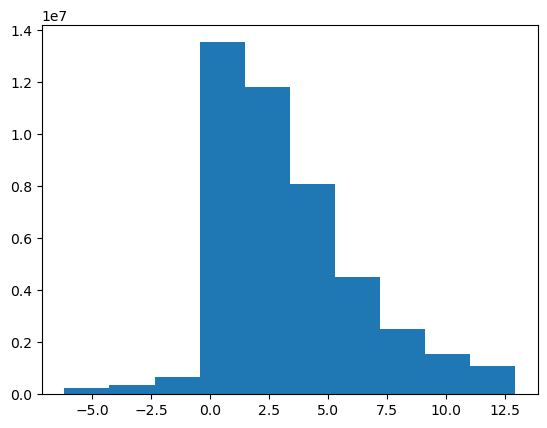

In [226]:
plt.hist(filtered_df['LT_PO_GRN'])
plt.show()

In [234]:
avg_lead_time = filtered_df.groupby('Vendor Code')['LT_PO_GRN'].mean().reset_index()
avg_lead_time.columns = ['Vendor', 'Average Lead Time']


In [235]:
avg_lead_time

,Vendor,Average Lead Time
0,VEN0001,6.560861
1,VEN0002,2.873930
2,VEN0003,3.550705
3,VEN0004,2.195263
4,VEN0005,3.758838
...,...,...
456,VEN0476,6.071586
457,VEN0477,0.358061
458,VEN0478,11.167940
459,VEN0479,0.017766


In [241]:
avg_lead_time.to_excel('knew_vendor_lead_time_output.xlsx', index=False)
